In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import astropy.units as u

# Some plotting config
sns.set(
    context="notebook",
    style="darkgrid",
    font="Times New Roman",
    font_scale=1.75,
)

plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams.update({"text.usetex": True})


import fitter
import fitter.visualize as viz

In [2]:
obs = fitter.Observations("NGC0104")

In [3]:
mcmcviz = viz.MCMCVisualizer("NGC0104_sampler.hdf", obs)
m = mcmcviz.get_model()
from fitter.util.units import angular_width

u.set_enabled_equivalencies(angular_width(m.d))

/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/ssptools/evolve_mf_3.py:246: RuntimeWarning: divide by zero encountered in double_scalars
  Aj = Nj / self.Pk(alphaj, 1, m1, mto)
/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/astropy/units/quantity.py:613: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


/home/peter/research/GCfit/fitter/probabilities/pulsars.py:445: RuntimeWarning: invalid value encountered in log10
  Pdot_int = np.log10(Pdot_int)

/home/peter/research/GCfit/fitter/probabilities/mass.py:126: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self.polygon = ops.unary_union([geom.Polygon(c).buffer(0)

/home/peter/research/GCfit/fitter/probabilities/mass.py:91: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  self._prepped = [prepgeom.prep(p) for p in self.polygon]

/home/peter/research/GCfit/fitter/probabilities/mass.py:235: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the co

In [4]:
civiz = mcmcviz.get_CImodel(Nprocesses=6, N=1024, binary_fraction=0.0)

/home/peter/research/GCfit/fitter/visualize/models.py:2169: RuntimeWarning: divide by zero encountered in true_divide
  return mass_MS / mass_tot, mass_rem / mass_tot

/home/peter/research/GCfit/fitter/visualize/models.py:2169: RuntimeWarning: invalid value encountered in true_divide
  return mass_MS / mass_tot, mass_rem / mass_tot

/home/peter/anaconda3/envs/gcfit/lib/python3.9/site-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)



In [5]:
from astropy.stats import (
    knuth_bin_width,
    bayesian_blocks,
    scott_bin_width,
    freedman_bin_width,
)

In [6]:
knuth_bin_width(civiz.BH_mass)

23.08793670107567

BH Mass: 134.561 solMass + 92.044 solMass - 103.719 solMass
BH Number: 25.811 + 15.318 - 15.271



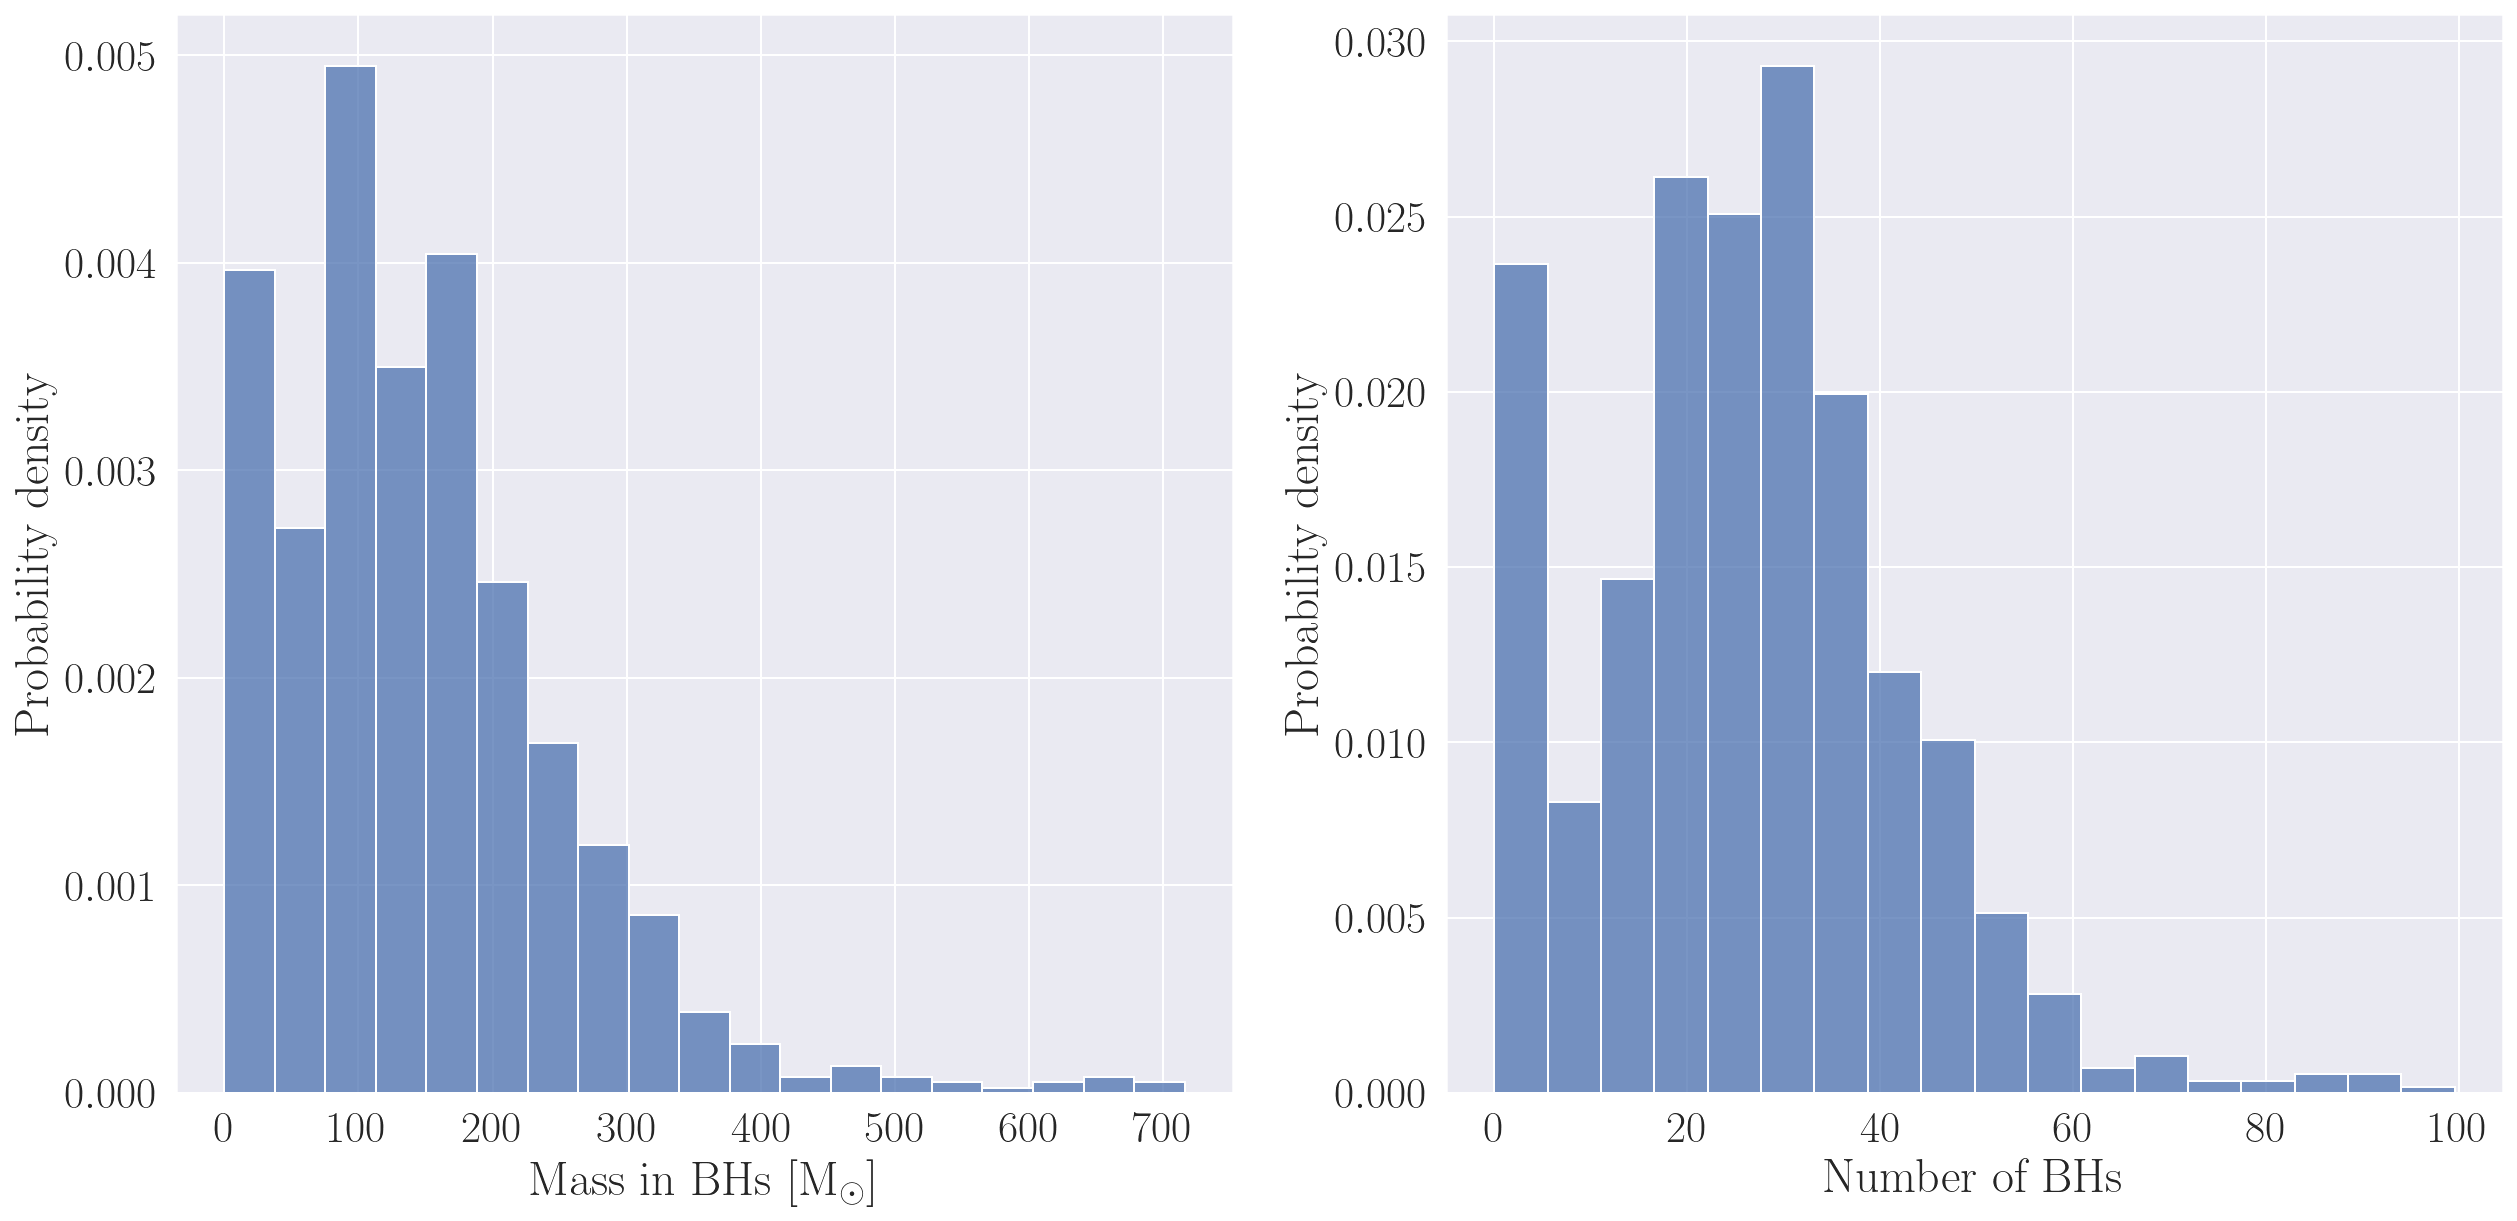

In [7]:
sns.set(
    context="notebook",
    style="darkgrid",
    font="Times New Roman",
    font_scale=2,
)

# BH Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

plt.sca(axes[0])
sns.histplot(
    x=civiz.BH_mass, kde=False, stat="density", binwidth=scott_bin_width(civiz.BH_mass)
)
plt.xlabel(r"Mass in BHs $[\mathrm{M}_\odot]$")
plt.ylabel("Probability density")


vals = np.percentile(civiz.BH_mass, [16, 50, 84])
q = np.diff(vals)
print(f"BH Mass: {vals[1]:.3f} + {q[0]:.3f} - {q[1]:.3f}")


plt.sca(axes[1])
sns.histplot(
    x=civiz.BH_num, kde=False, stat="density", binwidth=scott_bin_width(civiz.BH_num)
)
plt.xlabel(r"Number of BHs")
plt.ylabel("Probability density")
fig.tight_layout()

vals = np.percentile(civiz.BH_num, [16, 50, 84])
q = np.diff(vals)
print(f"BH Number: {vals[1]:.3f} + {q[0]:.3f} - {q[1]:.3f}")

fig.savefig("BH_dists.png", bbox_inches="tight", dpi=200)


print()

sns.set(
    context="notebook",
    style="darkgrid",
    font="Times New Roman",
    font_scale=1.75,
)

In [8]:
try:
    # plot Binary Mass
    fig = plt.figure(figsize=(10, 8))
    sns.histplot(
        x=civiz.Bin_mass,
        kde=False,
        stat="density",
        binwidth=scott_bin_width(civiz.Bin_mass),
    )
    plt.xlabel(r"Mass in Binaries $[\mathrm{M}_\odot]$")
    plt.ylabel("Probability density")
    fig.savefig("binary_mass.png", bbox_inches="tight", dpi=300)
except Exception:
    pass

<Figure size 720x576 with 0 Axes>

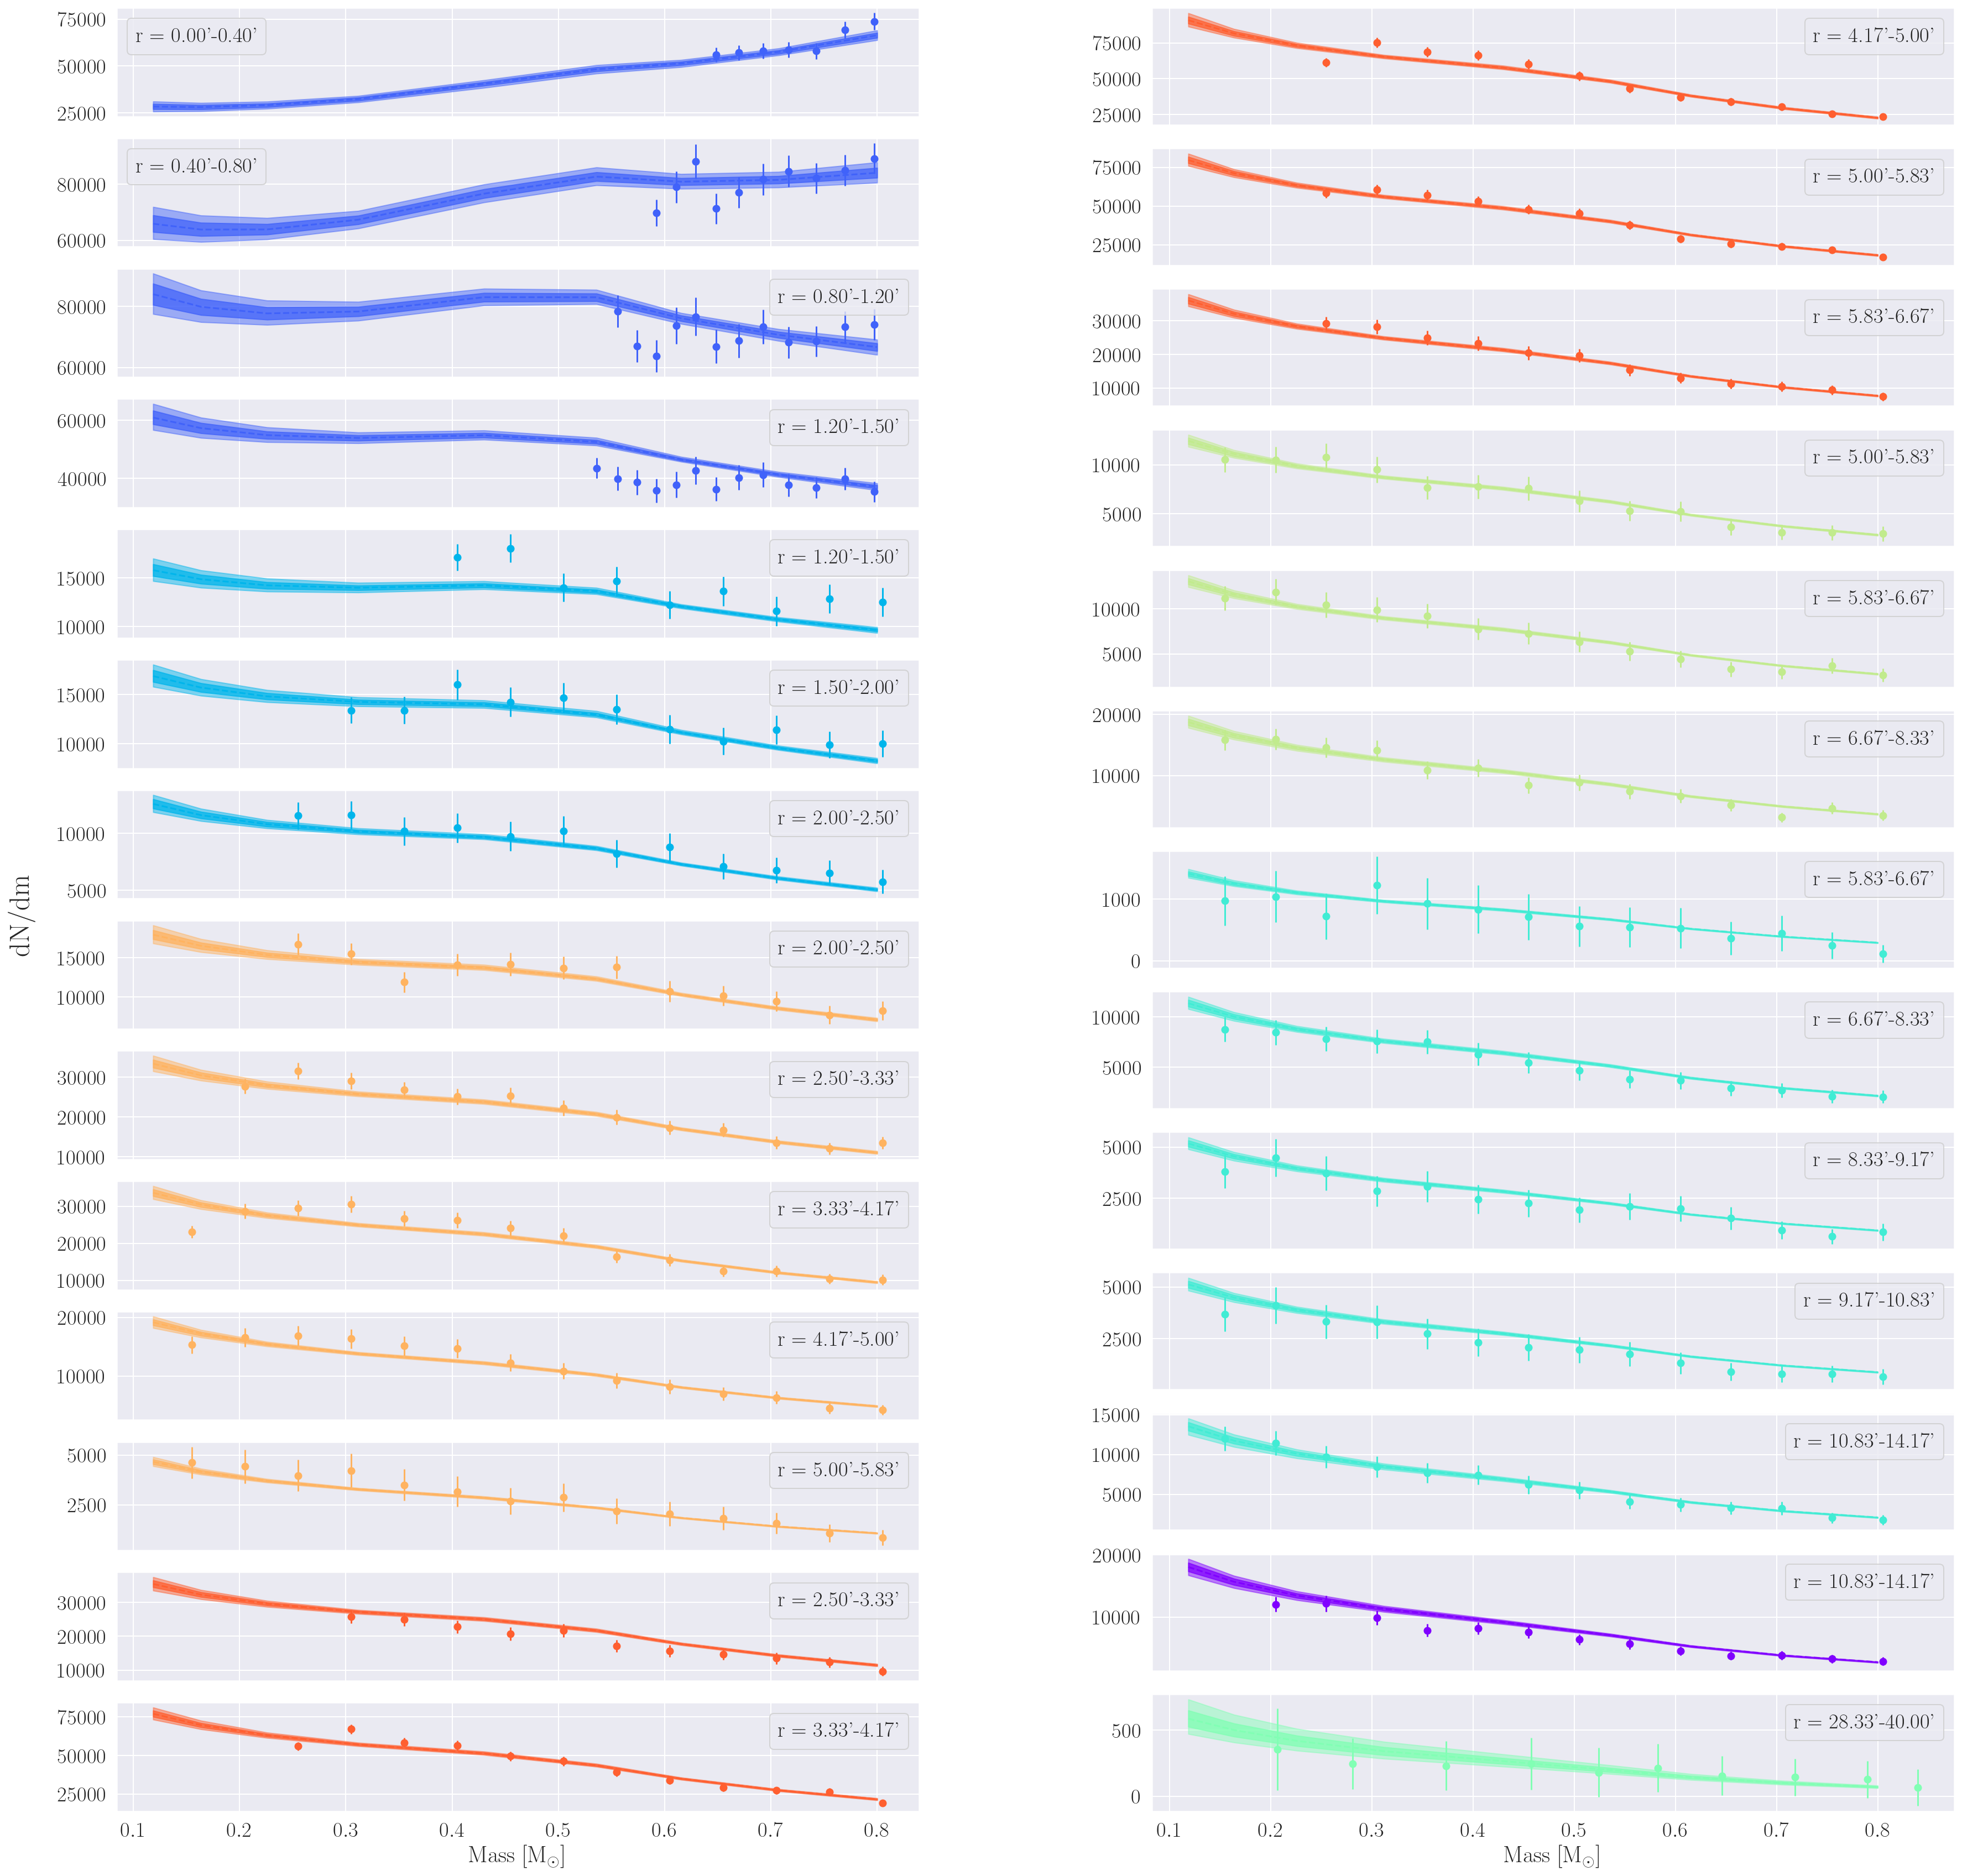

In [9]:
# plot mass function
fig = plt.figure(figsize=(26, 30))
civiz.plot_mass_func(fig=fig, rescaled=False)
# for a in fig.axes:
#     a.set_yscale("log")
#     a.set_xscale("log")
ax = plt.gca()


plt.gcf().get_axes()[13].set_xlabel('Mass [M$_{\odot}$]')
plt.gcf().get_axes()[-1].set_xlabel('Mass [M$_{\odot}$]')



fig.savefig("mass_fun.png", bbox_inches="tight", dpi=150)
plt.show()


# TODO: Figure out how to label the data

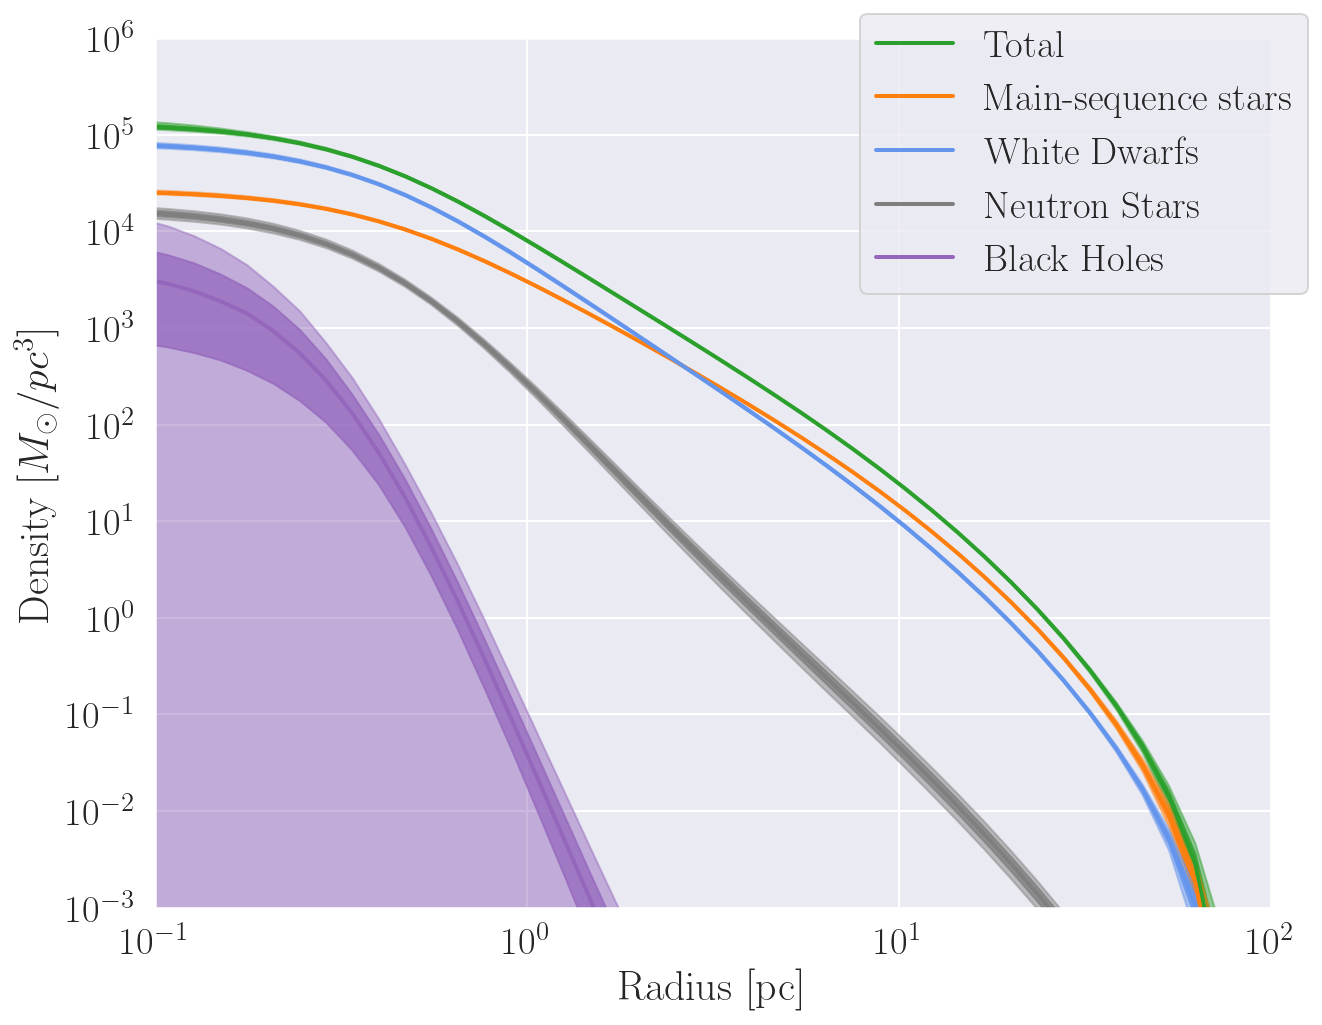

In [10]:
# plot density
fig = plt.figure(figsize=(10, 8))
civiz.plot_density(fig=fig, binaries=False)

plt.legend(loc="upper right", bbox_to_anchor=(1.05, 1.05))
fig.legends = []

plt.xlim(1e-1, 1e2)
plt.ylim(1e-3, 1e6)
plt.xlabel("Radius [pc]")


fig.savefig("density.png", bbox_inches="tight", dpi=200)


plt.show()

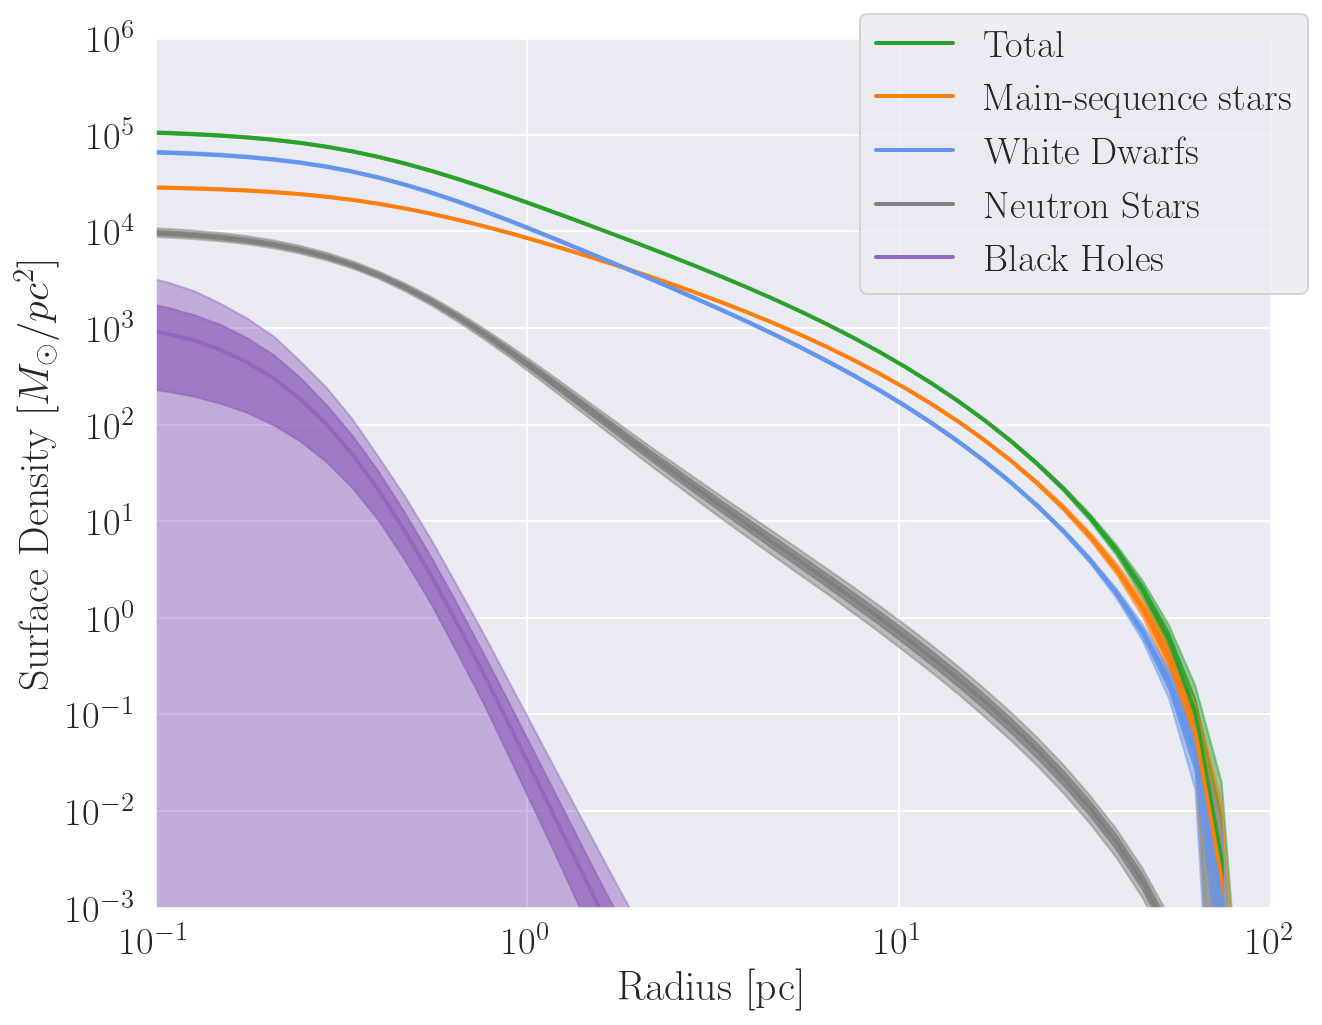

In [11]:
# plot surface density
fig = plt.figure(figsize=(10, 8))
civiz.plot_surface_density(fig=fig, binaries=False)

plt.legend(loc="upper right", bbox_to_anchor=(1.05, 1.05))
fig.legends = []

plt.xlim(1e-1, 1e2)
plt.ylim(1e-3, 1e6)
plt.xlabel("Radius [pc]")


fig.savefig("surface_dens.png", bbox_inches="tight", dpi=300)


plt.show()

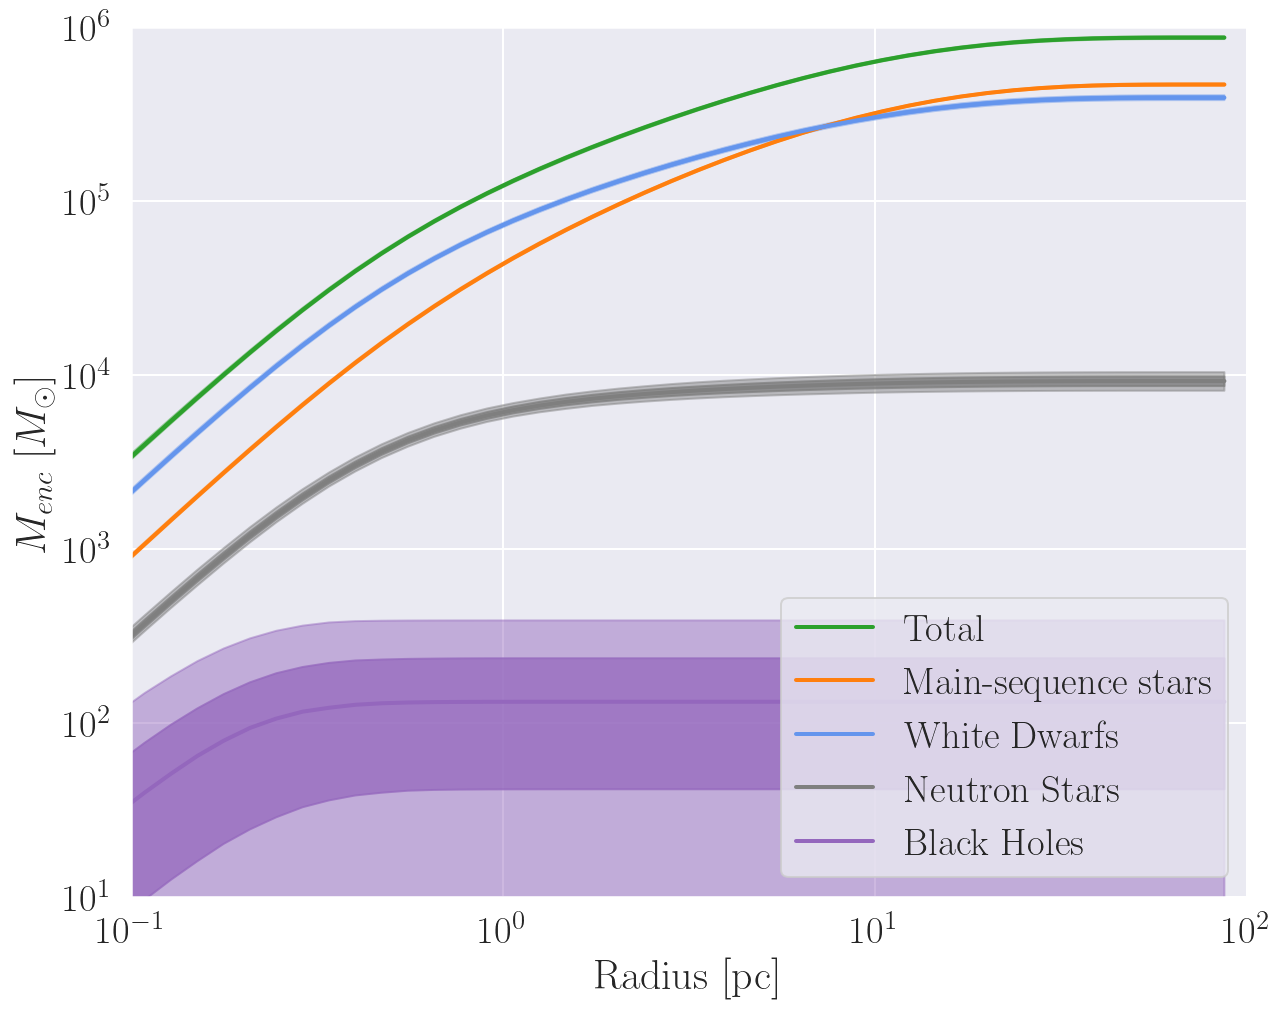

In [12]:
# plot enclosed mass
fig = plt.figure(figsize=(10, 8))
civiz.plot_cumulative_mass(fig=fig, binaries=False)

plt.legend(loc="lower right")
fig.legends = []

plt.xlim(1e-1, 1e2)
plt.ylim(1e1, 1e6)
plt.xlabel("Radius [pc]")


fig.savefig("mass_enc.png", bbox_inches="tight", dpi=300)


plt.show()

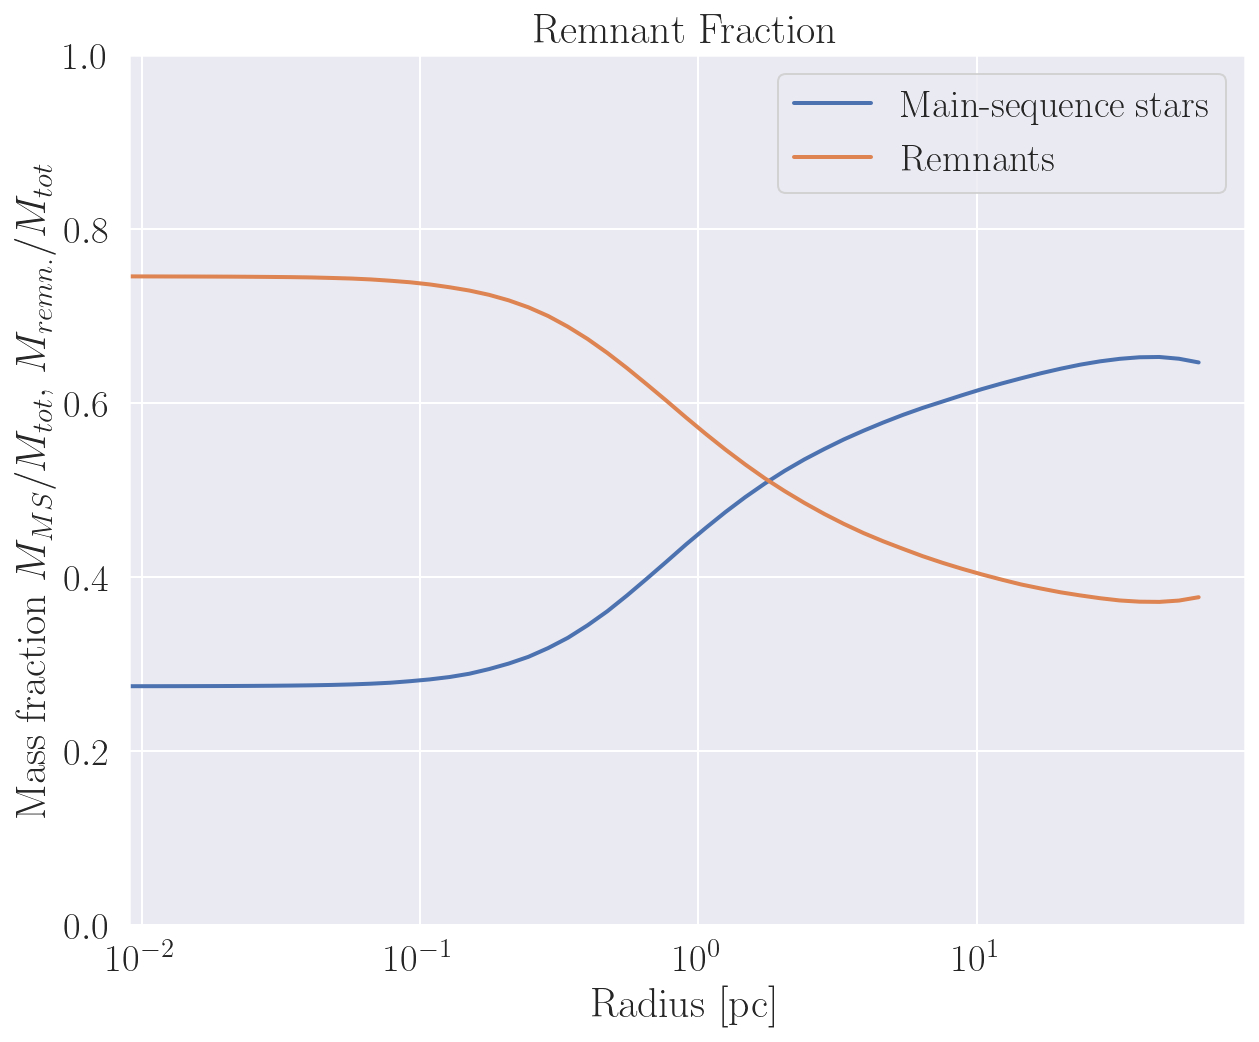

In [13]:
# plot
fig = plt.figure(figsize=(10, 8))
civiz.plot_remnant_fraction(fig=fig)

plt.legend()
fig.legends = []
plt.xlabel("Radius [pc]")


fig.savefig("remnant_frac.png", bbox_inches="tight", dpi=300)


plt.show()

In [14]:
plt.rcParams.update({"text.usetex": False})
sns.set(
    context="notebook",
    style="darkgrid",
    font="Times New Roman",
    font_scale=2.5,
)


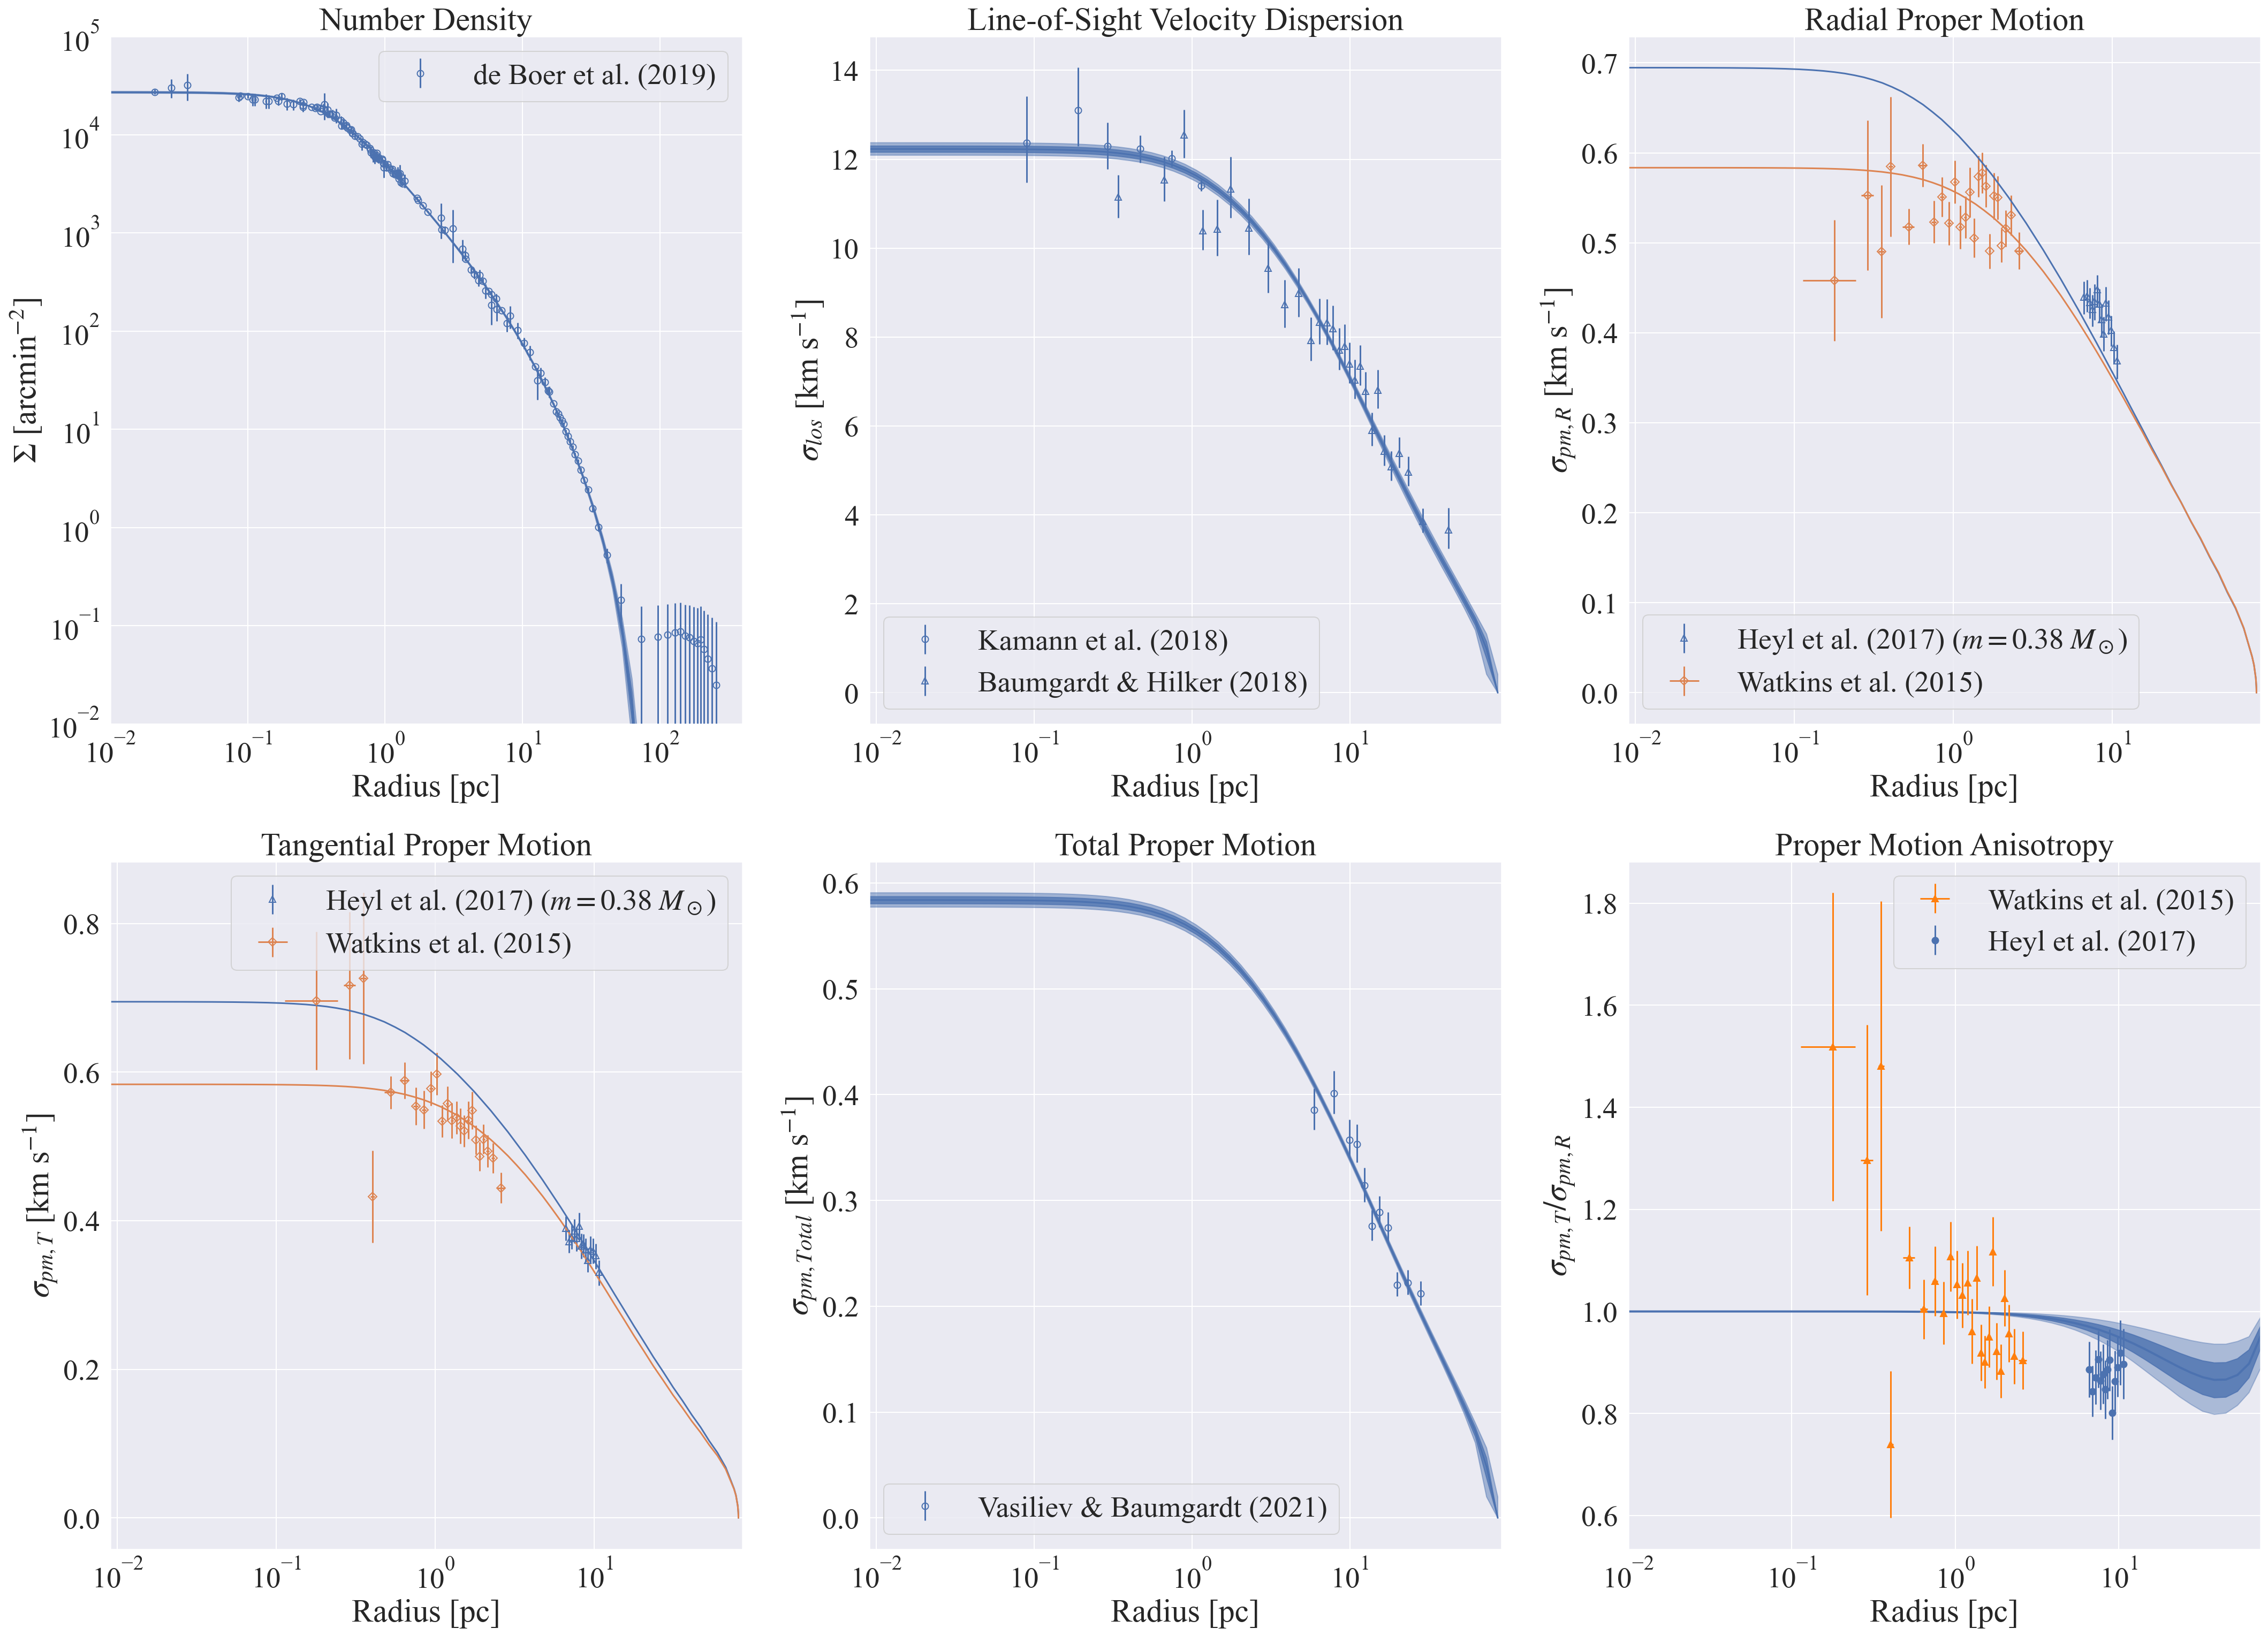

In [15]:
# giant 6 panel plot with all obs

fig, axes = plt.subplots(2, 3, figsize=(36, 26))
axes = axes.flatten()

plt.sca(axes[0])
civiz.plot_number_density(fig=fig, ax=axes[0], rescaled=False)
plt.legend()
fig.legends = []
plt.xlim(1e-2, 10**2.6)
plt.ylim(1e-2, 10**5)
plt.xlabel("Radius [pc]")
plt.ylabel(r"$\Sigma$ [arcmin$^{-2}$]")

plt.sca(axes[1])
civiz.plot_LOS(fig=fig, ax=axes[1])
plt.xlabel("Radius [pc]")
plt.ylabel(r"$\sigma_{los}$ [km s$^{-1}$]")


# TODO: replace both of these with CI plots when bug is fixed
plt.sca(axes[2])
m.plot_pm_R(fig=fig, ax=axes[2])
# civiz.plot_pm_R(fig=fig, ax=axes[3])
plt.xlabel("Radius [pc]")
plt.ylabel(r"$\sigma_{pm,R}$ [km s$^{-1}$]")



plt.sca(axes[3])
m.plot_pm_T(fig=fig, ax=axes[3])
# civiz.plot_pm_T(fig=fig, ax=axes[3])
plt.xlabel("Radius [pc]")
plt.ylabel(r"$\sigma_{pm,T}$ [km s$^{-1}$]")




plt.sca(axes[4])
civiz.plot_pm_tot(fig=fig, ax=axes[4])
plt.xlabel("Radius [pc]")
plt.ylabel(r"$\sigma_{pm,Total}$ [km s$^{-1}$]")











plt.sca(axes[5])
plt.xlabel("Radius [pc]")
plt.ylabel(r"$\sigma_{pm,T} / \sigma_{pm,R}$")
plt.xlim(1e-2,1e2)
ax = plt.gca()
ax.set_title("Proper Motion Anisotropy")

ax.set_xscale("log")


# civiz.plot_pm_ratio(fig=fig, ax=axes[5])

med = civiz.pm_ratio.shape[1]//2


r = civiz.r.value[:-1]
plt.plot(r,civiz.pm_ratio[0][med][:-1].value,color="b",lw=2)        
plt.fill_between(r,civiz.pm_ratio[0][med+1][:-1].value,civiz.pm_ratio[0][med-1][:-1].value,color="b",alpha=0.8)
plt.fill_between(r,civiz.pm_ratio[0][med+2][:-1].value,civiz.pm_ratio[0][med-2][:-1].value,color="b",alpha=0.4)















# watkins data
y = (
    obs.datasets["proper_motion/watkins"].variables["PM_T"]
    / obs.datasets["proper_motion/watkins"].variables["PM_R"]
)

yerr = fitter.util.probabilities.div_error(
    obs.datasets["proper_motion/watkins"].variables["PM_T"],
    obs.datasets["proper_motion/watkins"].variables["ΔPM_T"],
    obs.datasets["proper_motion/watkins"].variables["PM_R"],
    obs.datasets["proper_motion/watkins"].variables["ΔPM_R"],
)

x = obs.datasets["proper_motion/watkins"].variables["r"].to(u.pc)
xerr = obs.datasets["proper_motion/watkins"].variables["Δr"].to(u.pc)

plt.errorbar(
    x,
    y,
    xerr=xerr,
    yerr=yerr,
    label="Watkins et al. (2015)",
    color="tab:orange",
    fmt="^",
)

# heyl data
y = (
    obs.datasets["proper_motion/heyl"].variables["PM_T"]
    / obs.datasets["proper_motion/heyl"].variables["PM_R"]
)

err_pmt = np.maximum(
    obs.datasets["proper_motion/heyl"].variables["ΔPM_T,up"],
    obs.datasets["proper_motion/heyl"].variables["ΔPM_T,down"],
)
err_pmr = np.maximum(
    obs.datasets["proper_motion/heyl"].variables["ΔPM_R,up"],
    obs.datasets["proper_motion/heyl"].variables["ΔPM_R,down"],
)


yerr = fitter.util.probabilities.div_error(
    obs.datasets["proper_motion/heyl"].variables["PM_T"],
    err_pmt,
    obs.datasets["proper_motion/heyl"].variables["PM_R"],
    err_pmr,
)

x = obs.datasets["proper_motion/heyl"].variables["r"].to(u.pc)

plt.errorbar(x, y, yerr=yerr, label="Heyl et al. (2017)", color="b", fmt="o")
plt.legend()
plt.xlabel("Radius [pc]")
plt.xlim(1e-2,civiz.r[-2].value)


fig.savefig("obs_panel.png", bbox_inches="tight", dpi=200)
plt.show()

In [16]:
iter_rate = np.array(mcmcviz.file["statistics"]["iteration_rate"])

np.mean(iter_rate) = 117.632s


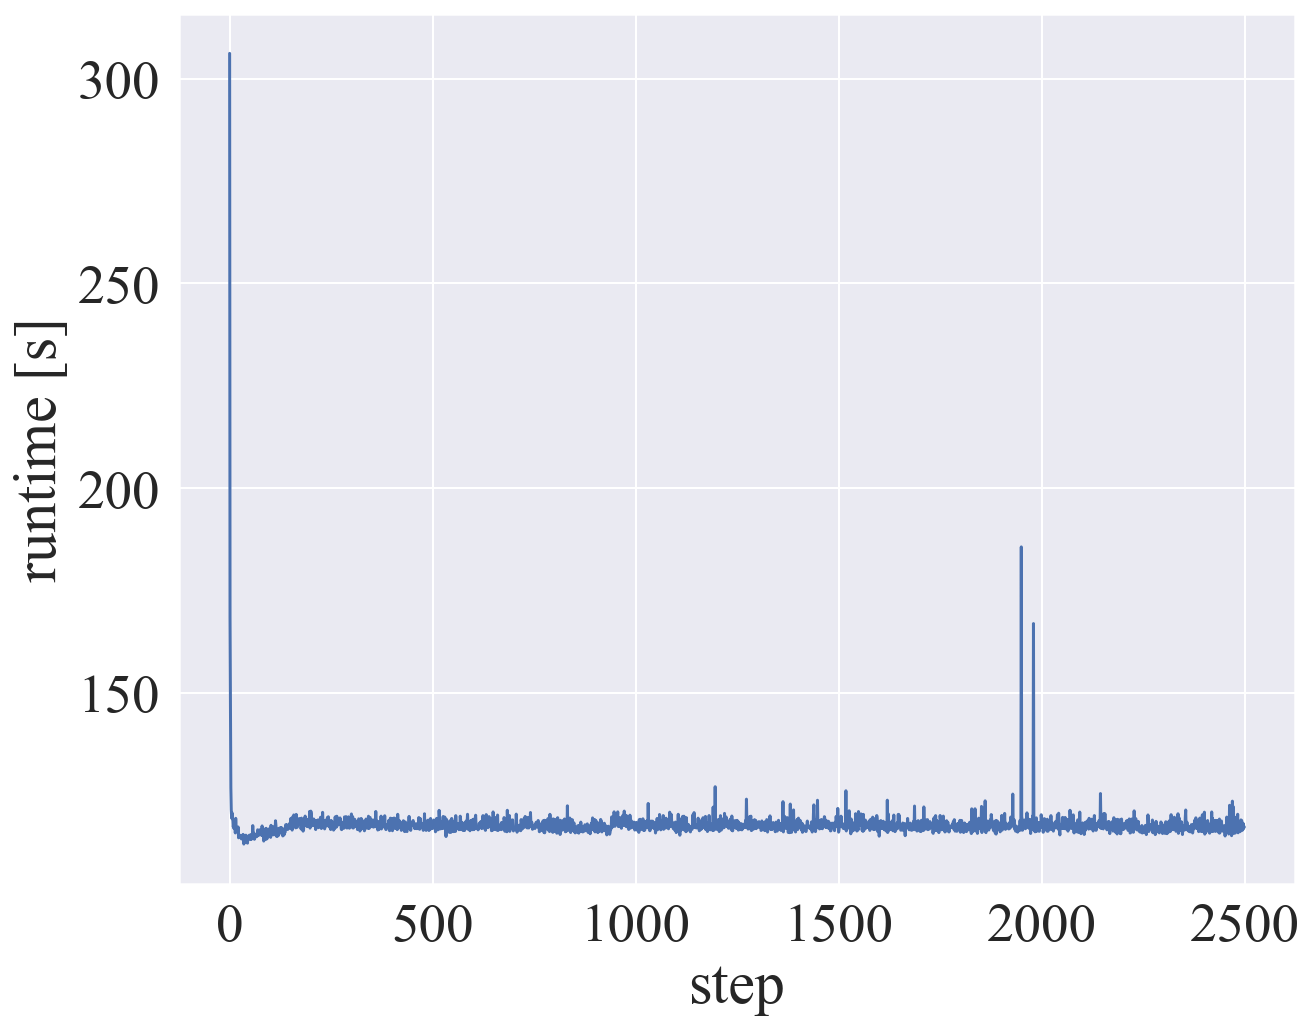

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(iter_rate)
plt.xlabel("step")
plt.ylabel("runtime [s]")
print(f"{np.mean(iter_rate) = :.3f}s")

In [18]:
acc_rate = np.array(mcmcviz.file["statistics"]["acceptance_rate"])

np.mean(acc_rate) = 0.236


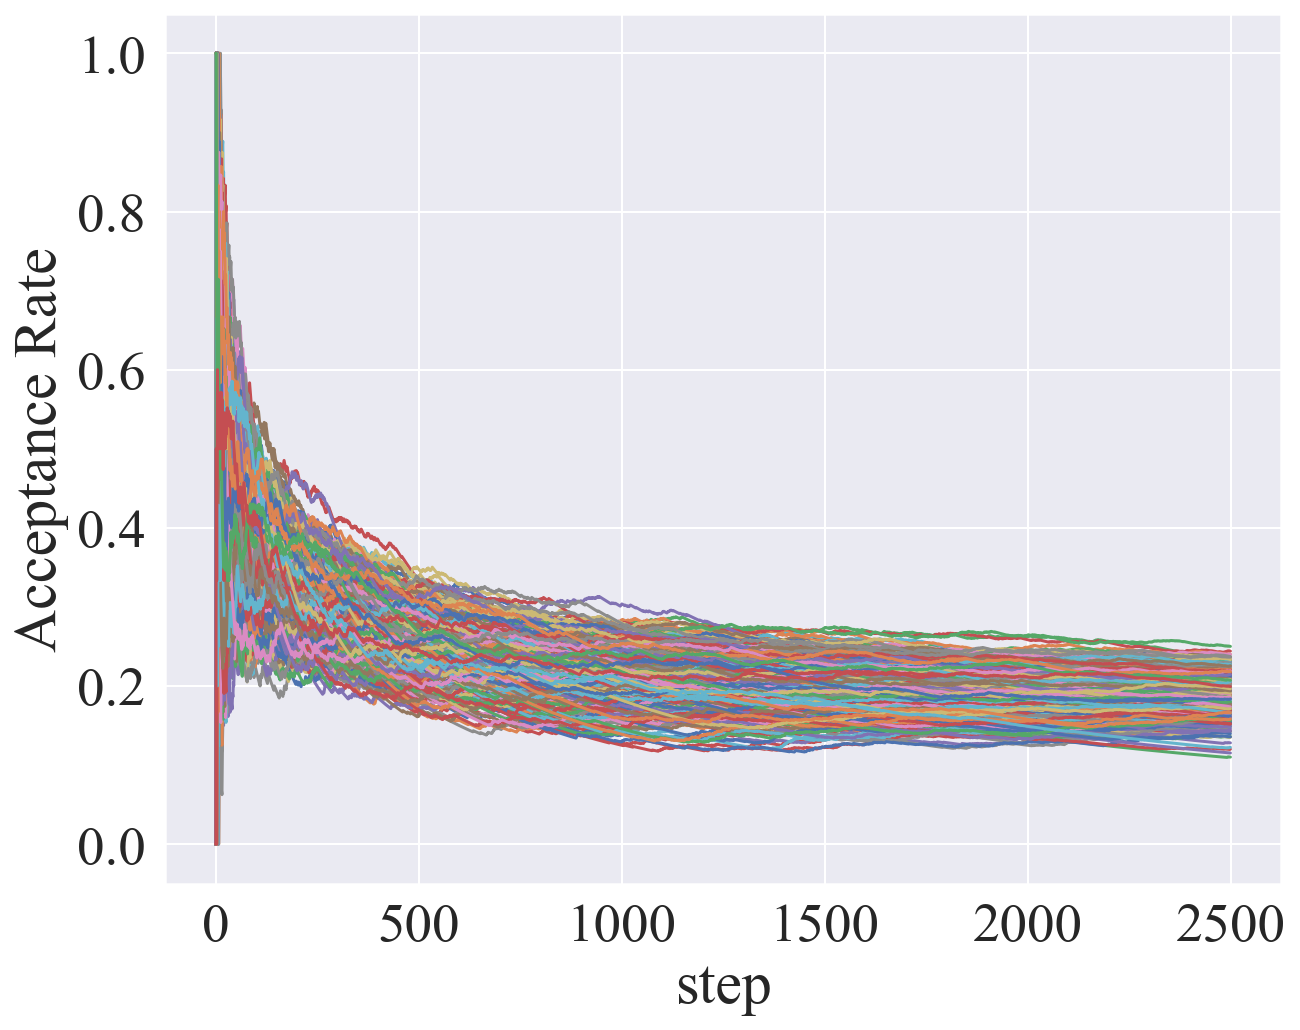

In [19]:
plt.figure(figsize=(10, 8))
plt.plot(acc_rate)
plt.xlabel("step")
plt.ylabel("Acceptance Rate")
print(f"{np.mean(acc_rate) = :.3f}")

In [20]:
civiz.rt

<Quantity 86.6970806 pc>

In [21]:
civiz.pm_ratio.shape[1]//2


2

In [22]:
civiz.pm_ratio

<Quantity [[[1.        , 1.        , 1.        , ..., 0.95048896,
             0.98858386, 0.99361229],
            [1.        , 1.        , 1.        , ..., 0.92465533,
             0.97132722, 0.        ],
            [1.        , 1.        , 1.        , ..., 0.8977625 ,
             0.9515049 , 0.        ],
            [1.        , 1.        , 1.        , ..., 0.87004008,
             0.92791233, 0.        ],
            [1.        , 1.        , 1.        , ..., 0.84098461,
             0.88868584, 0.        ]],

           [[1.        , 1.        , 1.        , ..., 0.97412726,
             0.99384959, 0.99665946],
            [1.        , 1.        , 1.        , ..., 0.95897149,
             0.984641  , 0.        ],
            [1.        , 1.        , 1.        , ..., 0.94339517,
             0.97386572, 0.        ],
            [1.        , 1.        , 1.        , ..., 0.9259701 ,
             0.96037098, 0.        ],
            [1.        , 1.        , 1.        , ..., 0.908066

In [23]:
import arviz

In [24]:
import emcee

In [25]:
reader = emcee.backends.HDFBackend("./NGC0104_sampler.hdf")

In [26]:
reader

In [27]:
a = arviz.from_emcee(reader)

In [28]:
arviz.summary(a)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
var_0,6.293,0.116,6.084,6.509,0.002,0.001,4469.0,9539.0,1.16
var_1,0.885,0.010,0.867,0.904,0.000,0.000,5467.0,11704.0,1.13
var_2,6.748,0.071,6.622,6.883,0.001,0.001,4535.0,9235.0,1.15
var_3,1.492,0.070,1.346,1.613,0.001,0.001,3970.0,4444.0,1.18
var_4,1.339,0.085,1.148,1.491,0.001,0.001,4274.0,7747.0,1.16
var_5,0.423,0.018,0.389,0.457,0.000,0.000,4533.0,9458.0,1.15
var_6,0.018,0.027,0.000,0.073,0.000,0.000,4383.0,8130.0,1.16
var_7,3.343,0.231,3.063,4.006,0.003,0.002,4808.0,11529.0,1.14
var_8,0.361,0.036,0.295,0.415,0.000,0.000,5994.0,11640.0,1.11
var_9,1.445,0.069,1.325,1.578,0.001,0.001,6046.0,11619.0,1.11
